# Generalized Procrustes analysis from TPS file

In [7]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.decomposition import PCA

from ktch.landmark import GeneralizedProcrustesAnalysis
from ktch.io import read_tps

## Reading TPS file

In [12]:
df_triangles = read_tps("./landmarks_triangle.tps", as_frame=True)
df_triangles

x         y
specimen_id coord_id                    
0           0        -0.531046 -0.280265
            1        -0.177303  1.107969
            2         0.850131  1.064210
1           0        -0.480121 -0.145592
            1        -0.172134  0.871833
...                        ...       ...
48          1        -0.153270  0.980145
            2         0.692266  0.797412
49          0         0.286409 -0.353412
            1         0.213187  0.819529
            2         0.905297  1.175739

[150 rows x 2 columns]

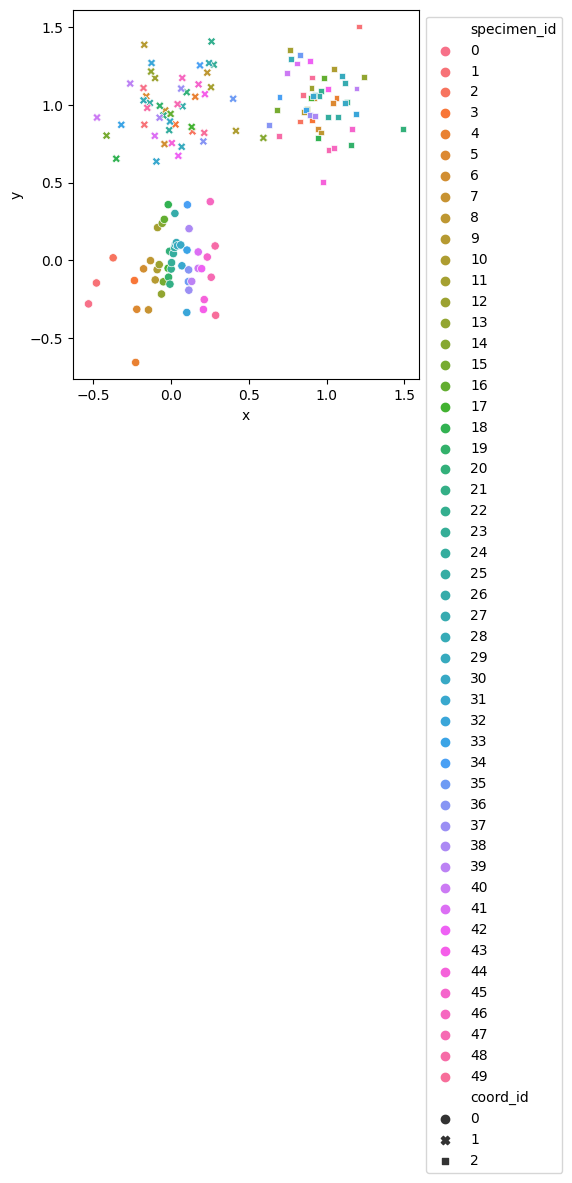

In [16]:
fig, ax = plt.subplots()
sns.scatterplot(
    data = df_triangles,
    x="x",y="y", 
    hue="specimen_id", style="coord_id",ax=ax
    )
ax.set_aspect('equal')
ax.legend(loc="upper left", bbox_to_anchor=(1, 1))

## GPA

In [8]:
gpa = GeneralizedProcrustesAnalysis().set_output(transform="pandas")

In [17]:
df_coords = df_triangles.unstack().swaplevel(1, 0, axis=1).sort_index(axis=1)
df_coords.columns = [dim +"_"+ str(landmark_idx) for landmark_idx,dim in df_coords.columns]
df_coords

df_shapes = gpa.fit_transform(df_coords)
df_shapes

,x_0,y_0,x_1,y_1,x_2,y_2
specimen_id,,,,,,
0,-0.308597,-0.638893,-0.182918,0.294741,0.491515,0.344152
1,-0.372170,-0.487439,-0.196930,0.072799,0.569100,0.414639
10,-0.397810,-0.561799,-0.035105,0.124281,0.432915,0.437517
11,-0.373001,-0.613285,-0.047049,0.202706,0.420049,0.410578
12,-0.252883,-0.620455,-0.273924,0.334570,0.526807,0.285885
13,-0.254776,-0.594599,-0.302713,0.305677,0.557490,0.288922
14,-0.382938,-0.569850,0.082585,0.152466,0.300353,0.417384
15,-0.219379,-0.552450,-0.364963,0.300367,0.584341,0.252083
16,-0.320254,-0.494104,-0.293554,0.133409,0.613809,0.360695


In [18]:
df_shapes_vis = df_shapes.copy()
df_shapes_vis.columns = pd.MultiIndex.from_tuples([[int(landmark_idx), dim] for dim, landmark_idx in [idx.split("_") for idx in df_shapes_vis.columns]], names=["coord_id","dim"])
df_shapes_vis.sort_index(axis=1, inplace=True)
df_shapes_vis = df_shapes_vis.swaplevel(0,1,axis=1).stack(level=1)
df_shapes_vis

dim                          x         y
specimen_id coord_id                    
0           0        -0.308597 -0.638893
            1        -0.182918  0.294741
            2         0.491515  0.344152
1           0        -0.372170 -0.487439
            1        -0.196930  0.072799
...                        ...       ...
8           1        -0.223183  0.396410
            2         0.454658  0.260687
9           0        -0.162853 -0.625506
            1        -0.292329  0.437954
            2         0.455182  0.187552

[150 rows x 2 columns]

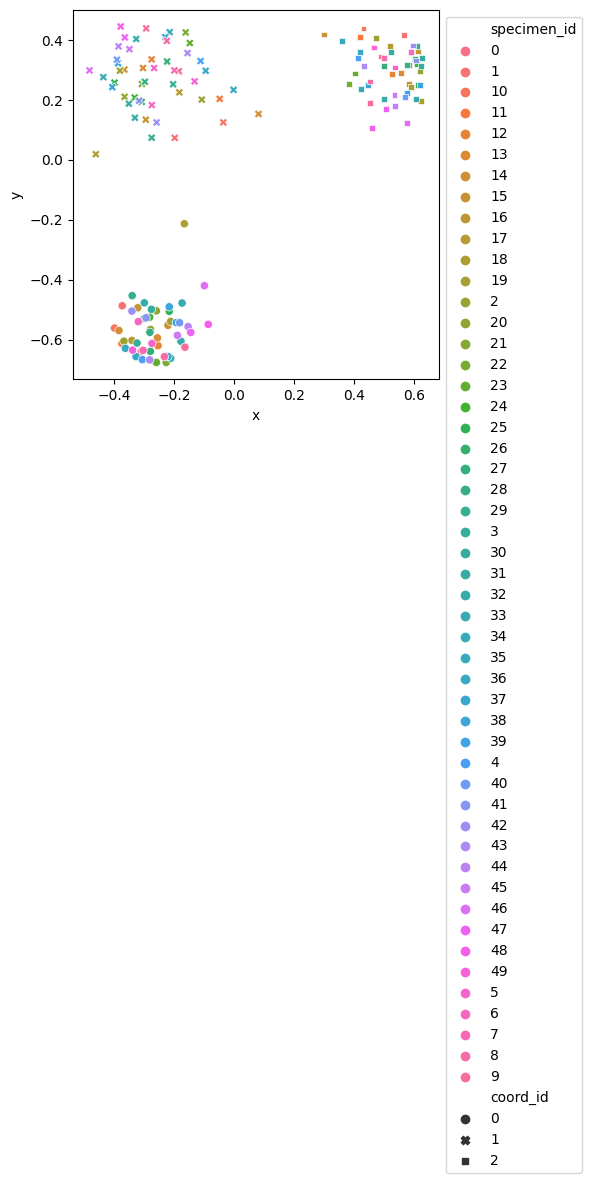

In [19]:
fig, ax = plt.subplots()
sns.scatterplot(
    data = df_shapes_vis,
    x="x",y="y", 
    hue="specimen_id", style="coord_id",ax=ax
    )
ax.set_aspect('equal')
ax.legend(loc="upper left", bbox_to_anchor=(1, 1))